In [1]:
#Mains
import numpy as np
import pandas as pd
import re
import string

#Models
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

#Sklearn Helpers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import  chi2

#For plots
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

<ipython-input-1-3bc90c1a1792>:25: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
df=pd.read_csv('ticaret-yorum.csv')
df=df.sample(n=40000, random_state=1)
df['text']=df['text'].str.lower()
df.head()

,category,text
100556,emlak-ve-insaat,"em-art banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldı,em-art banyo dolabı 4 yıl önce aldığımız sıfır eve em-art banyo dolabı takmışlar banyo dolap kapak içlerinin menteşeleri aldığımız zaman paslanmıştı biz bunları değiştirdik. şimdiki sorunumuz dolap kapağının iç kaplaması açıldı iki kere sorunumu em-art a yazdığım halde bir cevap yazmadılar bu kadar ...devamını oku"
300094,mobilya-ev-tekstili,"yataş yırtık gelen kargo paketi &kalemle çizilmiş gönderilen nevresim takımı,2 hafta önce yataş'ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı. i̇lk defa bu siteden alışveriş yaptım ve kesinlikle memnun kalmadım. bugün mng kargo çalışanı elinde üzerine çıkılıp ezilmiş bir paket getirdi. paketin zaten yarısı açık bantlarla tutturulmuş durumdaydı. nevresim ta...devamını oku"
53235,cep-telefon-kategori,"samsung galaxy a71 isınma sorunu,""samsung a71 telefonu yeni aldım ve 1 saattir kullanmama rağmen aşırı derecede bir ısınma mevcut. 2 hafta önce samsung marka farklı bir telefon almıştım ve ısınma sorunu nedeni ile iade ettim. bugün tekrar samsung'un farklı bir telefonunu almaya karar verip, 1 saattir kullanmama rağmen ve daha hiçbir...devamını oku"""
134558,finans,"ziraat bankası temel i̇htiyaç kredisinden 2 aydır cevap yok!,ziraat temel ihtiyaç kredisine başvurdum. neredeyse 2 ay oldu değerlendiriyor diyor ne sms ne de arama oldu. acil ihtiyacım var lütfen kısa sürede cevap verirseniz sevinirim. çok sıkıştım sizden bir haber bekliyorum çok zaman geçti bazı arkadaşlarıma hemen cevap geldi bana 2 ay oldu dönüş yapsanız d...devamını oku"
69942,egitim,"benim hocam yayınevi zaman kaybı,i̇nternette görüp bir anlık gaflete düşüp kitaplarını aldığım hoca. maalesef ki alan eğitimi kitabı ezbere ve hiçbir yerde çıkmayacak bilgilerle oluşturulmuş. soru bankası ve bilerek maddi çıkarlardan ötürü hazırlanmış video ders notları. sırf ders notları alınsın diye neredeyse ders notlarıyla aynı ...devamını oku"


In [3]:
#df['category'].value_counts().sort_index(ascending=False).plot(kind='bar', figsize=(12, 8))

In [4]:
df['text_new'] = df['text'].str.replace('...devamını oku', '')
df.head(5)

,category,text,text_new
100556,emlak-ve-insaat,"em-art banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldı,em-art banyo dolabı 4 yıl önce aldığımız sıfır eve em-art banyo dolabı takmışlar banyo dolap kapak içlerinin menteşeleri aldığımız zaman paslanmıştı biz bunları değiştirdik. şimdiki sorunumuz dolap kapağının iç kaplaması açıldı iki kere sorunumu em-art a yazdığım halde bir cevap yazmadılar bu kadar ...devamını oku","em-art banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldı,em-art banyo dolabı 4 yıl önce aldığımız sıfır eve em-art banyo dolabı takmışlar banyo dolap kapak içlerinin menteşeleri aldığımız zaman paslanmıştı biz bunları değiştirdik. şimdiki sorunumuz dolap kapağının iç kaplaması açıldı iki kere sorunumu em-art a yazdığım halde bir cevap yazmadılar bu kadar"
300094,mobilya-ev-tekstili,"yataş yırtık gelen kargo paketi &kalemle çizilmiş gönderilen nevresim takımı,2 hafta önce yataş'ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı. i̇lk defa bu siteden alışveriş yaptım ve kesinlikle memnun kalmadım. bugün mng kargo çalışanı elinde üzerine çıkılıp ezilmiş bir paket getirdi. paketin zaten yarısı açık bantlarla tutturulmuş durumdaydı. nevresim ta...devamını oku","yataş yırtık gelen kargo paketi &kalemle çizilmiş gönderilen nevresim takımı,2 hafta önce yataş'ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı. i̇lk defa bu siteden alışveriş yaptım ve kesinlikle memnun kalmadım. bugün mng kargo çalışanı elinde üzerine çıkılıp ezilmiş bir paket getirdi. paketin zaten yarısı açık bantlarla tutturulmuş durumdaydı. nevresim ta"
53235,cep-telefon-kategori,"samsung galaxy a71 isınma sorunu,""samsung a71 telefonu yeni aldım ve 1 saattir kullanmama rağmen aşırı derecede bir ısınma mevcut. 2 hafta önce samsung marka farklı bir telefon almıştım ve ısınma sorunu nedeni ile iade ettim. bugün tekrar samsung'un farklı bir telefonunu almaya karar verip, 1 saattir kullanmama rağmen ve daha hiçbir...devamını oku""","samsung galaxy a71 isınma sorunu,""samsung a71 telefonu yeni aldım ve 1 saattir kullanmama rağmen aşırı derecede bir ısınma mevcut. 2 hafta önce samsung marka farklı bir telefon almıştım ve ısınma sorunu nedeni ile iade ettim. bugün tekrar samsung'un farklı bir telefonunu almaya karar verip, 1 saattir kullanmama rağmen ve daha hiçbir"""
134558,finans,"ziraat bankası temel i̇htiyaç kredisinden 2 aydır cevap yok!,ziraat temel ihtiyaç kredisine başvurdum. neredeyse 2 ay oldu değerlendiriyor diyor ne sms ne de arama oldu. acil ihtiyacım var lütfen kısa sürede cevap verirseniz sevinirim. çok sıkıştım sizden bir haber bekliyorum çok zaman geçti bazı arkadaşlarıma hemen cevap geldi bana 2 ay oldu dönüş yapsanız d...devamını oku","ziraat bankası temel i̇htiyaç kredisinden 2 aydır cevap yok!,ziraat temel ihtiyaç kredisine başvurdum. neredeyse 2 ay oldu değerlendiriyor diyor ne sms ne de arama oldu. acil ihtiyacım var lütfen kısa sürede cevap verirseniz sevinirim. çok sıkıştım sizden bir haber bekliyorum çok zaman geçti bazı arkadaşlarıma hemen cevap geldi bana 2 ay oldu dönüş yapsanız d"
69942,egitim,"benim hocam yayınevi zaman kaybı,i̇nternette görüp bir anlık gaflete düşüp kitaplarını aldığım hoca. maalesef ki alan eğitimi kitabı ezbere ve hiçbir yerde çıkmayacak bilgilerle oluşturulmuş. soru bankası ve bilerek maddi çıkarlardan ötürü hazırlanmış video ders notları. sırf ders notları alınsın diye neredeyse ders notlarıyla aynı ...devamını oku","benim hocam yayınevi zaman kaybı,i̇nternette görüp bir anlık gaflete düşüp kitaplarını aldığım hoca. maalesef ki alan eğitimi kitabı ezbere ve hiçbir yerde çıkmayacak bilgilerle oluşturulmuş. soru bankası ve bilerek maddi çıkarlardan ötürü hazırlanmış video ders notları. sırf ders notları alınsın diye neredeyse ders notlarıyla aynı"
368600,sigortacilik,"gulf sigorta tablet çatlağı sorunu,""750 tl'lik tablete 250 tl'ye kasko yaptırdım. full kasko dendi. düşme, kırılma, hırsızlık vs. gibi. daha 1 aylıkken ekran camı çatladı. garantiye gönderd

* Due to possible bias, I felt like you should do my best to remove brands name as much as possible. So
I got brands name from the website and turn in into a file and exclude it from datafraöe

In [5]:
brands=pd.read_csv('https://raw.githubusercontent.com/pytmar/Jupyter-Notebooks/master/turkish_brands%20-%20Sayfa1.csv')
brands.columns=['brand_name']
pat = r'\b(?:{})\b'.format('|'.join(list(brands['brand_name'].str.lower())))
df['text_new'] = df['text_new'].str.replace(pat, '')
df.head(5)

,category,text,text_new
100556,emlak-ve-insaat,"em-art banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldı,em-art banyo dolabı 4 yıl önce aldığımız sıfır eve em-art banyo dolabı takmışlar banyo dolap kapak içlerinin menteşeleri aldığımız zaman paslanmıştı biz bunları değiştirdik. şimdiki sorunumuz dolap kapağının iç kaplaması açıldı iki kere sorunumu em-art a yazdığım halde bir cevap yazmadılar bu kadar ...devamını oku","em-art banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldı,em-art banyo dolabı 4 yıl önce aldığımız sıfır eve em-art banyo dolabı takmışlar banyo kapak içlerinin menteşeleri aldığımız zaman paslanmıştı biz bunları değiştirdik. şimdiki sorunumuz kapağının iç kaplaması açıldı iki kere sorunumu em-art a yazdığım halde bir cevap yazmadılar bu kadar"
300094,mobilya-ev-tekstili,"yataş yırtık gelen kargo paketi &kalemle çizilmiş gönderilen nevresim takımı,2 hafta önce yataş'ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı. i̇lk defa bu siteden alışveriş yaptım ve kesinlikle memnun kalmadım. bugün mng kargo çalışanı elinde üzerine çıkılıp ezilmiş bir paket getirdi. paketin zaten yarısı açık bantlarla tutturulmuş durumdaydı. nevresim ta...devamını oku","yırtık gelen kargo paketi &kalemle çizilmiş gönderilen nevresim takımı,2 hafta önce 'ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı. i̇lk defa bu siteden alışveriş yaptım ve kesinlikle memnun kalmadım. bugün çalışanı elinde üzerine çıkılıp ezilmiş bir paket getirdi. paketin zaten yarısı açık bantlarla tutturulmuş durumdaydı. nevresim ta"
53235,cep-telefon-kategori,"samsung galaxy a71 isınma sorunu,""samsung a71 telefonu yeni aldım ve 1 saattir kullanmama rağmen aşırı derecede bir ısınma mevcut. 2 hafta önce samsung marka farklı bir telefon almıştım ve ısınma sorunu nedeni ile iade ettim. bugün tekrar samsung'un farklı bir telefonunu almaya karar verip, 1 saattir kullanmama rağmen ve daha hiçbir...devamını oku""","galaxy a71 isınma sorunu,"" a71 telefonu yeni aldım ve 1 saattir kullanmama rağmen aşırı derecede bir ısınma mevcut. 2 hafta önce marka farklı bir telefon almıştım ve ısınma sorunu nedeni ile iade ettim. bugün tekrar 'un farklı bir telefonunu almaya karar verip, 1 saattir kullanmama rağmen ve daha hiçbir"""
134558,finans,"ziraat bankası temel i̇htiyaç kredisinden 2 aydır cevap yok!,ziraat temel ihtiyaç kredisine başvurdum. neredeyse 2 ay oldu değerlendiriyor diyor ne sms ne de arama oldu. acil ihtiyacım var lütfen kısa sürede cevap verirseniz sevinirim. çok sıkıştım sizden bir haber bekliyorum çok zaman geçti bazı arkadaşlarıma hemen cevap geldi bana 2 ay oldu dönüş yapsanız d...devamını oku","temel i̇htiyaç kredisinden 2 aydır cevap yok!,ziraat temel ihtiyaç kredisine başvurdum. neredeyse 2 ay oldu değerlendiriyor diyor ne sms ne de arama oldu. acil ihtiyacım var lütfen kısa sürede cevap verirseniz sevinirim. çok sıkıştım sizden bir haber bekliyorum çok zaman geçti bazı arkadaşlarıma hemen cevap geldi bana 2 ay oldu dönüş yapsanız d"
69942,egitim,"benim hocam yayınevi zaman kaybı,i̇nternette görüp bir anlık gaflete düşüp kitaplarını aldığım hoca. maalesef ki alan eğitimi kitabı ezbere ve hiçbir yerde çıkmayacak bilgilerle oluşturulmuş. soru bankası ve bilerek maddi çıkarlardan ötürü hazırlanmış video ders notları. sırf ders notları alınsın diye neredeyse ders notlarıyla aynı ...devamını oku","zaman kaybı,i̇nternette görüp bir anlık gaflete düşüp kitaplarını aldığım hoca. maalesef ki alan eğitimi kitabı ezbere ve hiçbir yerde çıkmayacak bilgilerle oluşturulmuş. soru bankası ve bilerek maddi çıkarlardan ötürü hazırlanmış video ders notları. sırf ders notları alınsın diye neredeyse ders notlarıyla aynı"


In [ ]:
#df.sample(5)

* I truly love nltk but it is not enough for Turkish language but lucky me i found a better data
for our language's stop words so below i exclude them.

In [7]:
stop_words = pd.read_csv('https://raw.githubusercontent.com/InJuxSanct/turkish-stopwords/master/src/lib/stopwords/raw-stopwords.txt', sep=" ", header=None)
stop_words.columns=['words_list']
pat2 = r'\b(?:{})\b'.format('|'.join(list(stop_words['words_list'].str.lower())))
df['text_new2'] = df['text_new'].str.lower().str.replace(pat2, '')
df.head(5)

,category,text,text_new,text_new2
100556,emlak-ve-insaat,"em-art banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldı,em-art banyo dolabı 4 yıl önce aldığımız sıfır eve em-art banyo dolabı takmışlar banyo dolap kapak içlerinin menteşeleri aldığımız zaman paslanmıştı biz bunları değiştirdik. şimdiki sorunumuz dolap kapağının iç kaplaması açıldı iki kere sorunumu em-art a yazdığım halde bir cevap yazmadılar bu kadar ...devamını oku","em-art banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldı,em-art banyo dolabı 4 yıl önce aldığımız sıfır eve em-art banyo dolabı takmışlar banyo kapak içlerinin menteşeleri aldığımız zaman paslanmıştı biz bunları değiştirdik. şimdiki sorunumuz kapağının iç kaplaması açıldı iki kere sorunumu em-art a yazdığım halde bir cevap yazmadılar bu kadar","em-art banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldı,em-art banyo dolabı 4 yıl aldığımız sıfır eve em-art banyo dolabı takmışlar banyo kapak içlerinin menteşeleri aldığımız zaman paslanmıştı değiştirdik. şimdiki sorunumuz kapağının iç kaplaması açıldı sorunumu em-art a yazdığım halde cevap yazmadılar"
300094,mobilya-ev-tekstili,"yataş yırtık gelen kargo paketi &kalemle çizilmiş gönderilen nevresim takımı,2 hafta önce yataş'ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı. i̇lk defa bu siteden alışveriş yaptım ve kesinlikle memnun kalmadım. bugün mng kargo çalışanı elinde üzerine çıkılıp ezilmiş bir paket getirdi. paketin zaten yarısı açık bantlarla tutturulmuş durumdaydı. nevresim ta...devamını oku","yırtık gelen kargo paketi &kalemle çizilmiş gönderilen nevresim takımı,2 hafta önce 'ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı. i̇lk defa bu siteden alışveriş yaptım ve kesinlikle memnun kalmadım. bugün çalışanı elinde üzerine çıkılıp ezilmiş bir paket getirdi. paketin zaten yarısı açık bantlarla tutturulmuş durumdaydı. nevresim ta","yırtık gelen kargo paketi &kalemle çizilmiş gönderilen nevresim takımı,2 hafta 'ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı. i̇lk siteden alışveriş yaptım kesinlikle memnun kalmadım. bugün çalışanı elinde üzerine çıkılıp ezilmiş paket getirdi. paketin yarısı açık bantlarla tutturulmuş durumdaydı. nevresim ta"
53235,cep-telefon-kategori,"samsung galaxy a71 isınma sorunu,""samsung a71 telefonu yeni aldım ve 1 saattir kullanmama rağmen aşırı derecede bir ısınma mevcut. 2 hafta önce samsung marka farklı bir telefon almıştım ve ısınma sorunu nedeni ile iade ettim. bugün tekrar samsung'un farklı bir telefonunu almaya karar verip, 1 saattir kullanmama rağmen ve daha hiçbir...devamını oku""","galaxy a71 isınma sorunu,"" a71 telefonu yeni aldım ve 1 saattir kullanmama rağmen aşırı derecede bir ısınma mevcut. 2 hafta önce marka farklı bir telefon almıştım ve ısınma sorunu nedeni ile iade ettim. bugün tekrar 'un farklı bir telefonunu almaya karar verip, 1 saattir kullanmama rağmen ve daha hiçbir""","galaxy a71 isınma sorunu,"" a71 telefonu yeni aldım 1 saattir kullanmama aşırı derecede ısınma mevcut. 2 hafta marka farklı telefon almıştım ısınma sorunu nedeni iade ettim. bugün tekrar 'un farklı telefonunu almaya karar verip, 1 saattir kullanmama """
134558,finans,"ziraat bankası temel i̇htiyaç kredisinden 2 aydır cevap yok!,ziraat temel ihtiyaç kredisine başvurdum. neredeyse 2 ay oldu değerlendiriyor diyor ne sms ne de arama oldu. acil ihtiyacım var lütfen kısa sürede cevap verirseniz sevinirim. çok sıkıştım sizden bir haber bekliyorum çok zaman geçti bazı arkadaşlarıma hemen cevap geldi bana 2 ay oldu dönüş yapsanız d...devamını oku","temel i̇htiyaç kredisinden 2 aydır cevap yok!,ziraat temel ihtiyaç kredisine başvurdum. neredeyse 2 ay oldu değerlendiriyor diyor ne sms ne de arama oldu. acil ihtiyacım var lütfen kısa sürede cevap verirseniz sevinirim. çok sıkıştım sizden bir haber bekliyorum çok zaman geçti bazı arkadaşlarıma hemen cevap geldi bana 2 ay oldu dönüş yapsanız d","temel i̇htiyaç kredisinden 2 aydır cevap !,ziraat temel ihtiyaç kredis

* punctuation operations will be done with striing library

In [8]:
df=df.dropna()
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df['text_final'] = df['text_new2'].apply(lambda text: remove_punctuation(text))  
df.head(5)

,category,text,text_new,text_new2,text_final
100556,emlak-ve-insaat,"em-art banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldı,em-art banyo dolabı 4 yıl önce aldığımız sıfır eve em-art banyo dolabı takmışlar banyo dolap kapak içlerinin menteşeleri aldığımız zaman paslanmıştı biz bunları değiştirdik. şimdiki sorunumuz dolap kapağının iç kaplaması açıldı iki kere sorunumu em-art a yazdığım halde bir cevap yazmadılar bu kadar ...devamını oku","em-art banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldı,em-art banyo dolabı 4 yıl önce aldığımız sıfır eve em-art banyo dolabı takmışlar banyo kapak içlerinin menteşeleri aldığımız zaman paslanmıştı biz bunları değiştirdik. şimdiki sorunumuz kapağının iç kaplaması açıldı iki kere sorunumu em-art a yazdığım halde bir cevap yazmadılar bu kadar","em-art banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldı,em-art banyo dolabı 4 yıl aldığımız sıfır eve em-art banyo dolabı takmışlar banyo kapak içlerinin menteşeleri aldığımız zaman paslanmıştı değiştirdik. şimdiki sorunumuz kapağının iç kaplaması açıldı sorunumu em-art a yazdığım halde cevap yazmadılar",emart banyo mobilyaları banyo dolabı kapağının i̇ç kaplaması açıldıemart banyo dolabı 4 yıl aldığımız sıfır eve emart banyo dolabı takmışlar banyo kapak içlerinin menteşeleri aldığımız zaman paslanmıştı değiştirdik şimdiki sorunumuz kapağının iç kaplaması açıldı sorunumu emart a yazdığım halde cevap yazmadılar
300094,mobilya-ev-tekstili,"yataş yırtık gelen kargo paketi &kalemle çizilmiş gönderilen nevresim takımı,2 hafta önce yataş'ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı. i̇lk defa bu siteden alışveriş yaptım ve kesinlikle memnun kalmadım. bugün mng kargo çalışanı elinde üzerine çıkılıp ezilmiş bir paket getirdi. paketin zaten yarısı açık bantlarla tutturulmuş durumdaydı. nevresim ta...devamını oku","yırtık gelen kargo paketi &kalemle çizilmiş gönderilen nevresim takımı,2 hafta önce 'ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı. i̇lk defa bu siteden alışveriş yaptım ve kesinlikle memnun kalmadım. bugün çalışanı elinde üzerine çıkılıp ezilmiş bir paket getirdi. paketin zaten yarısı açık bantlarla tutturulmuş durumdaydı. nevresim ta","yırtık gelen kargo paketi &kalemle çizilmiş gönderilen nevresim takımı,2 hafta 'ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı. i̇lk siteden alışveriş yaptım kesinlikle memnun kalmadım. bugün çalışanı elinde üzerine çıkılıp ezilmiş paket getirdi. paketin yarısı açık bantlarla tutturulmuş durumdaydı. nevresim ta",yırtık gelen kargo paketi kalemle çizilmiş gönderilen nevresim takımı2 hafta ın internet sitesinden aldığım nevresim takımı bugün elime ulaştı i̇lk siteden alışveriş yaptım kesinlikle memnun kalmadım bugün çalışanı elinde üzerine çıkılıp ezilmiş paket getirdi paketin yarısı açık bantlarla tutturulmuş durumdaydı nevresim ta
53235,cep-telefon-kategori,"samsung galaxy a71 isınma sorunu,""samsung a71 telefonu yeni aldım ve 1 saattir kullanmama rağmen aşırı derecede bir ısınma mevcut. 2 hafta önce samsung marka farklı bir telefon almıştım ve ısınma sorunu nedeni ile iade ettim. bugün tekrar samsung'un farklı bir telefonunu almaya karar verip, 1 saattir kullanmama rağmen ve daha hiçbir...devamını oku""","galaxy a71 isınma sorunu,"" a71 telefonu yeni aldım ve 1 saattir kullanmama rağmen aşırı derecede bir ısınma mevcut. 2 hafta önce marka farklı bir telefon almıştım ve ısınma sorunu nedeni ile iade ettim. bugün tekrar 'un farklı bir telefonunu almaya karar verip, 1 saattir kullanmama rağmen ve daha hiçbir""","galaxy a71 isınma sorunu,"" a71 telefonu yeni aldım 1 saattir kullanmama aşırı derecede ısınma mevcut. 2 hafta marka farklı telefon almıştım ısınma sorunu nedeni iade ettim. bugün tekrar 'un farklı telefonunu almaya karar verip, 1 saattir kullanmama """,galaxy a71 isınma sorunu a71 telefonu yeni aldım 1 saattir kullanmama aşırı derecede ısınma mevcut 2 hafta marka farklı telefon almıştım ısınma sorunu nedeni iade et

* We can see some wordcloud general and for choosen catagery

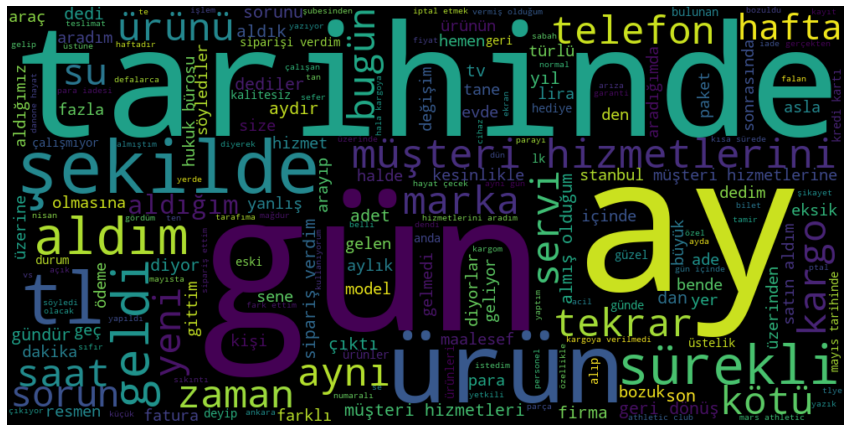

In [9]:
wordcloud = WordCloud(width=1000, height=500).generate("+".join(df['text_final']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

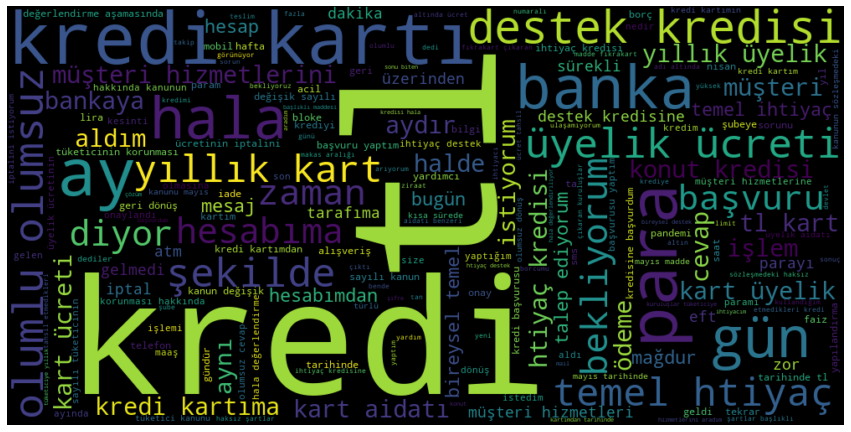

In [10]:
wordcloud = WordCloud(width=1000, height=500).generate("+".join(df['text_final'].loc[df['category']=='finans']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
#splitting datafame
X_train, X_test, y_train, y_test = train_test_split(df['text_final'], df['category'], random_state = 0)

* I will first create a pipeline for SGDClassifier for GridSearch

In [12]:
trial = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['text_final'], df['category'], random_state = 0)

"""parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    # 'clf__max_iter': (10, 50, 80),
}
grid_search = GridSearchCV(trial,  parameters, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
print(best_parameters)"""

'parameters = {\n    \'vect__max_df\': (0.5, 0.75, 1.0),\n    \'vect__max_features\': (None, 5000, 10000, 50000),\n    \'vect__ngram_range\': ((1, 1), (1, 2)),  # unigrams or bigrams\n    #\'tfidf__use_idf\': (True, False),\n    # \'tfidf__norm\': (\'l1\', \'l2\'),\n    \'clf__max_iter\': (20,),\n    \'clf__alpha\': (0.00001, 0.000001),\n    \'clf__penalty\': (\'l2\', \'elasticnet\'),\n    # \'clf__max_iter\': (10, 50, 80),\n}\ngrid_search = GridSearchCV(trial,  parameters, n_jobs=-1, verbose=1)\n\ngrid_search.fit(X_train, y_train)\nprint("Best score: %0.3f" % grid_search.best_score_)\nprint("Best parameters set:")\nbest_parameters = grid_search.best_estimator_.get_params()\nprint(best_parameters)'

* I can now use best params in my pipeline

In [14]:
trial = Pipeline([('vect', CountVectorizer(max_df=0.75, ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='modified_huber',alpha=1e-05, max_iter=20, penalty='elasticnet')),])
trial.fit(X_train, y_train)
print("Accuracy: " + str(trial.score(X_test, y_test)))

Accuracy: 0.7904


* Second model can be LinearSVC

In [15]:
trial2 = Pipeline([('vectorizer',CountVectorizer()), 
                   ('tfidf', TfidfTransformer()),
                   ('classifier', LinearSVC())])
trial2.fit(X_train, y_train)
print("Accuracy: " + str(trial2.score(X_test, y_test)))

Accuracy: 0.7886


### Checking the results with real sentences from www.sikayetvar.com for both classifier.

In [16]:
cv = CountVectorizer(ngram_range=(1,2))
message="""çocuğum doğduğundan beridir Molfix bel bantlı bezi çok güzeldi, taki 3 gün önce bir eczaneden
Molfix 3 midi 6-11 kg 94 adetlik külot bez alana kadar. Aldığım bez daha 3 kez kullanımda sızdırma yapıyor
ve halen külot bez sızdırmakta devam ediyor. İçinden daha fazla bir şey kullanamadık elimizde kaldı. Öyle 
bu geri kalanı iade veya değişim yapılmasını talep ediyorum. Molfix'e hiç yakışmadı. Gerçekten sürekli bez
değiştirirken elbisede değiştirmek zorunda kalıyorduk. Normal bel bantlı bezle değiştirilirse sevinirim."""
data = [message]
n=3
probs = trial.predict(data)
probs

array(['anne-bebek'], dtype='<U25')

In [17]:
message="""çocuğum doğduğundan beridir Molfix bel bantlı bezi çok güzeldi, taki 3 gün önce bir eczaneden
Molfix 3 midi 6-11 kg 94 adetlik külot bez alana kadar. Aldığım bez daha 3 kez kullanımda sızdırma yapıyor
ve halen külot bez sızdırmakta devam ediyor. İçinden daha fazla bir şey kullanamadık elimizde kaldı. Öyle 
bu geri kalanı iade veya değişim yapılmasını talep ediyorum. Molfix'e hiç yakışmadı. Gerçekten sürekli bez
değiştirirken elbisede değiştirmek zorunda kalıyorduk. Normal bel bantlı bezle değiştirilirse sevinirim."""
data = [message]
probs =trial2.predict(data)
probs

array(['anne-bebek'], dtype=object)

* And predict proba's

In [18]:
message="""çocuğum doğduğundan beridir Molfix bel bantlı bezi çok güzeldi, taki 3 gün önce bir eczaneden
Molfix 3 midi 6-11 kg 94 adetlik külot bez alana kadar. Aldığım bez daha 3 kez kullanımda sızdırma yapıyor
ve halen külot bez sızdırmakta devam ediyor. İçinden daha fazla bir şey kullanamadık elimizde kaldı. Öyle 
bu geri kalanı iade veya değişim yapılmasını talep ediyorum. Molfix'e hiç yakışmadı. Gerçekten sürekli bez
değiştirirken elbisede değiştirmek zorunda kalıyorduk. Normal bel bantlı bezle değiştirilirse sevinirim."""
data = [message]
pd.DataFrame(sorted(zip(trial.classes_, trial.predict_proba(data)[0])), columns=['class', 'probability']).sort_values(by='probability', ascending=False).head(3)

,class,probability
1,anne-bebek,1.0
0,alisveris,0.0
30,turizm,0.0


* Let's finally see classification report for each classes for SGDClassifier.

In [19]:
y_pred=trial.predict(X_test)
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                alisveris       0.50      0.39      0.44       298
               anne-bebek       0.83      0.71      0.77       311
               beyaz-esya       0.78      0.91      0.84       317
               bilgisayar       0.84      0.84      0.84       305
     cep-telefon-kategori       0.77      0.87      0.82       299
                   egitim       0.75      0.67      0.71       333
               elektronik       0.76      0.77      0.77       314
          emlak-ve-insaat       0.88      0.73      0.80       255
                   enerji       0.85      0.96      0.90       324
 etkinlik-ve-organizasyon       0.94      0.86      0.90       296
                   finans       0.74      0.86      0.80       318
                     gida       0.81      0.85      0.83       312
                    giyim       0.47      0.62      0.54       306
           hizmet-sektoru       0.89      0.89      0.89     

* And here we will see the most import unigrams and bigrams for  classifiers

In [22]:
df['category_id']=df['category'].factorize()[0]
category_id_df = df[['text_final', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

features = tfidf.fit_transform(df.text_final).toarray()
labels = df.category_id

N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# '     firmanın bünyesinde   yazık evde kalmamız gereken günlerde  aboneliğimiz olmasına  tvden izleyemiyoruz televizyona yansıtamıyoruz bilgisayarımızdan yansıtamıyoruz gerçekten yazık  bi an  çözüm bulmanızı öneririm   müşteri kaybedersi':
  . Most correlated unigrams:
       . smart
       . tv
  . Most correlated bigrams:
       . tv aldım
       . smart tv
# '     yaptıklarını  hala anlamış değilim1 gün  adana optimum  mağazasından baby plus taxi baston bebek arabası satın aldık  mağaza  ürünü iade etmişiz   hediye çeki kullanmışız  gösterdi  gri renk araba ellerinde  halde ellerinde olmadığını  kırmızı rengini sattılar  iade falan vermedik artı mağ':
  . Most correlated unigrams:
       . bez
       . bebek
  . Most correlated bigrams:
       . bebek arabası
       . bebek bezi
# '    borçi̇sim soy isim tutuyor   bilgileri     borcu 2 sefer farklı avukatlar  icra yoluna gidilmekte avukatlar  görüşmemize istinaden borçlu  değilsiniz özür dileriz gediz elektrikten dilekçe doldurun

KeyboardInterrupt: 

## Sources:
Data: https://www.kaggle.com/savasy/multiclass-classification-data-for-turkish-tc32